In [318]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [319]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [320]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [321]:
# Combine the data into a single dataset
# Display the data table for preview
merged_table = pd.merge(city_data_df, ride_data_df, on="city")
merged_table.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [322]:
#re-index rides by city
ride_reindexed_df = merged_table.set_index('city')
ride_reindexed_df.head()

,driver_count,type,date,fare,ride_id
city,,,,,
Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [323]:
#Average Fare per City
city_data = merged_table.groupby("city")
average_fare = (city_data['fare'].sum()/city_data["fare"].count()).round(2)
average_fare.head()

city
Amandaburgh      24.64
Barajasview      25.33
Barronchester    36.42
Bethanyland      32.96
Bradshawfurt     40.06
Name: fare, dtype: float64

In [324]:
#Total Number of Rides Per City
rides_per_city = merged_table["city"].value_counts()
rides_per_city.head()

West Angela        39
South Karenland    38
North Jason        35
Port Frank         33
Liumouth           33
Name: city, dtype: int64

In [325]:
# Total Number of Drivers Per City
drivers_per_city = merged_table.groupby("city")["driver_count"].mean()
drivers_per_city.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [326]:
# City Type (Urban, Suburban, Rural)
#city_type = city_data_df["type"].unique()
#city_type 

In [327]:
city_type = city_data_df.set_index('city')['type']
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [328]:
pyber = pd.DataFrame({"Average Fare Per City": average_fare,
                     "Number of Rides": rides_per_city,
                     "Number of Drivers": drivers_per_city,
                     "City Type": city_type})
pyber.head()

,Average Fare Per City,City Type,Number of Drivers,Number of Rides
Amandaburgh,24.64,Urban,12,18
Barajasview,25.33,Urban,26,22
Barronchester,36.42,Suburban,11,16
Bethanyland,32.96,Suburban,22,18
Bradshawfurt,40.06,Rural,7,10


## Bubble Plot of Ride Sharing Data

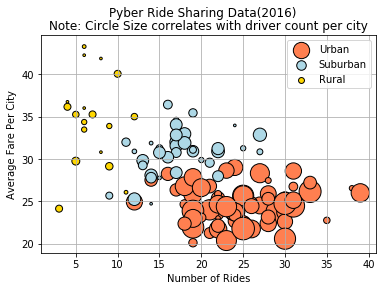

In [329]:
# Obtain the x and y coordinates for each of the three city types
urban_df = pyber.loc[pyber["City Type"] =="Urban"]
suburban_df = pyber.loc[pyber["City Type"] == "Suburban"]
rural_df = pyber.loc[pyber["City Type"] == "Rural"]

# Build the scatter plots for each city types
plt.scatter(urban_df["Number of Rides"], urban_df["Average Fare Per City"], s=urban_df["Number of Drivers"]*7, 
c="coral", edgecolor = "black", label = "Urban",alpha=1, linewidth=1)
plt.scatter(suburban_df["Number of Rides"], suburban_df["Average Fare Per City"], s=suburban_df["Number of Drivers"]*7, 
c="lightblue", label = "Suburban", edgecolor = "black", alpha=1, linewidth=1)
plt.scatter(rural_df["Number of Rides"], rural_df["Average Fare Per City"], s=rural_df["Number of Drivers"]*7, 
c="gold", label = "Rural", edgecolor = "black", alpha=1, linewidth=1)

# Incorporate the other graph properties
plt.suptitle("Pyber Ride Sharing Data(2016)")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")

# Create a legend
legend = plt.legend(labels=["Urban", "Suburban","Rural"])
plt.legend(loc="best")
plt.grid()
# Incorporate a text label regarding circle size
plt.title("Note: Circle Size correlates with driver count per city")
# Save Figure
plt.savefig("../Images/Pyber_Ride_Sharing_Data.png")

## Total Fares by City Type

In [330]:
total_fares = merged_table.groupby('type')['fare'].sum()
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

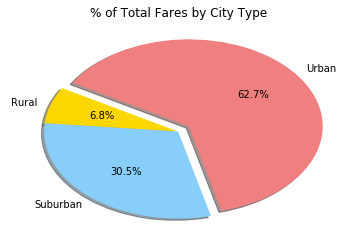

In [331]:
#Build Pie Chart
total_fares_pie = total_fares.plot(kind="pie",
    colors=["gold", "lightskyblue", "lightcoral"], autopct="%1.1f%%",
    startangle=150, explode=(0, 0, 0.1), shadow=True,
    title=("% of Total Fares by City Type"))
plt.ylabel("")
# Save Figure
plt.savefig("../Images/Total_Fares_by_City_Type.png")

## Total Rides by City Type

In [332]:
total_rides = merged_table.groupby("type")["city"].count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

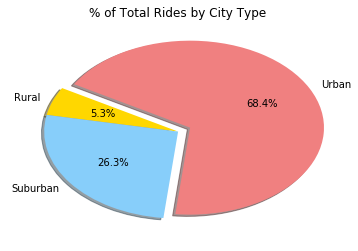

In [333]:
# Build Pie Chart
total_rides_pie = total_rides.plot(kind="pie",
    colors=["gold", "lightskyblue", "lightcoral"], autopct="%1.1f%%",
    startangle=150, explode=(0, 0, 0.1), shadow=True,
    title=("% of Total Rides by City Type"))
plt.ylabel("")

# Save Figure
plt.savefig("../Images/Total_Rides_By_City.png")

## Total Drivers by City Type

In [334]:
total_drivers = city_data_df.groupby('type')['driver_count'].sum()
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

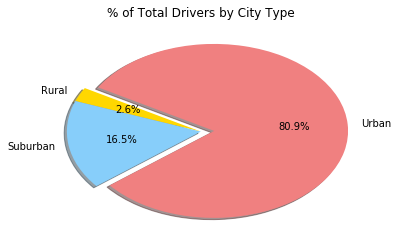

In [335]:
total_drivers_pie = total_drivers.plot(kind="pie",
    colors=["gold", "lightskyblue", "lightcoral"], autopct="%1.1f%%",
    startangle=150, explode=(0, 0, 0.1), shadow=True,
    title=("% of Total Drivers by City Type"))
plt.ylabel("")
plt.savefig("../Images/Total_Drivers_By_City.png")